## Two-dimensional array and gradient problem

### Problem 1: Linear function

In [15]:
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt

x_values: ndarray = np.arange(-50, 50.1, 0.1)
y_values: ndarray = (x_values/2) + 1

# print(x_values)
print(f"First 10: {y_values[0:10]}")
print(f"Last 10: {y_values[-10:-1]}")

First 10: [-24.   -23.95 -23.9  -23.85 -23.8  -23.75 -23.7  -23.65 -23.6  -23.55]
Last 10: [25.55 25.6  25.65 25.7  25.75 25.8  25.85 25.9  25.95]


#### Problem 2: Array combination

In [16]:
combined_array: ndarray = np.concatenate((x_values, y_values))
combined_array = combined_array.reshape(1001, 2)

### Problem 3: Find the gradient

In [17]:
x_amount_of_change = x_values[1:] - x_values[:-1]
y_amount_of_change = y_values[1:] - y_values[:-1]

gradient = y_amount_of_change / x_amount_of_change


### Problem 4: Draw a graph

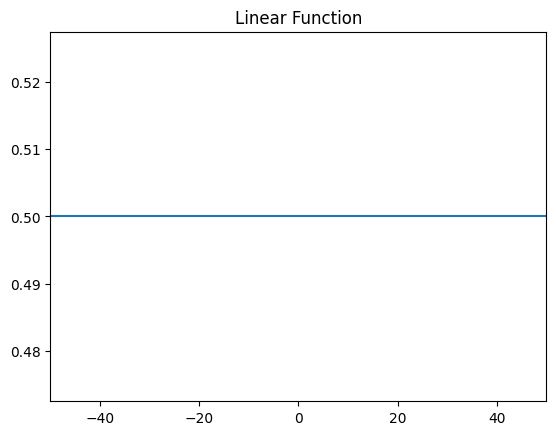

In [18]:
plt.title("Linear Function")
plt.plot(x_values[:-1], gradient)
plt.xlim(-50, 50)
plt.show()

###  Problem 5: Python functionalization

In [ ]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.

    Parameters
    ----------------
    function : function
      The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range : tuple
      Specify the range in the same way as the argument of np.arange ().

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      A combination of x and y. n depends on x_range.
    gradient : ndarray, shape(n-1,)
      Function gradient. One factor is reduced to make a difference
    """
    pass
    return array_xy, gradient
def function1(array_x):
    pass
    return array_y

array_xy, gradient = compute_gradient(function1)